# What is a Recommendation System ?

A recommender system is a type of information filtering system. By drawing from huge data sets, the system’s algorithm can pinpoint accurate user preferences. Once you know what your users like, you can recommend them new, relevant content. And that’s true for everything from movies and music, to romantic partners.

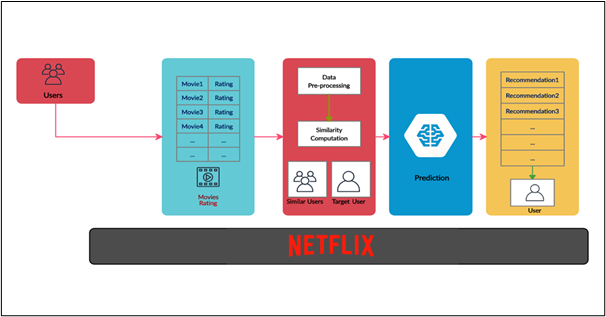

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [2]:
netflix_dataset = pd.read_csv("/kaggle/input/netflix-dataset/netflix_dataset.csv")
netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7281 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [4]:
#Identify the unique values
dict = {}
for i in list(netflix_dataset.columns):
    dict[i] = netflix_dataset[i].value_counts().shape[0]
    
print(pd.DataFrame(dict,index = ["Unique counts"]).transpose())


              Unique counts
show_id                7787
type                      2
title                  7787
director               4049
cast                   6831
country                 681
date_added             1565
release_year             73
rating                   14
duration                216
listed_in               492
description            7769


In [5]:
#Identify the missing values

temp = netflix_dataset.isnull().sum()
uniq = pd.DataFrame({'Columns': temp.index, 'Missing values': temp.values})
uniq

,Columns,Missing values
0,show_id,0
1,type,0
2,title,0
3,director,2389
4,cast,718
5,country,506
6,date_added,10
7,release_year,0
8,rating,7
9,duration,0


# Analysis of Movies vs TV Shows

In [6]:
netflix_shows=netflix_dataset[netflix_dataset['type']=='TV Show']
netflix_movies=netflix_dataset[netflix_dataset['type']=='Movie']

Text(0.5, 1.0, 'TV Shows VS Movies')

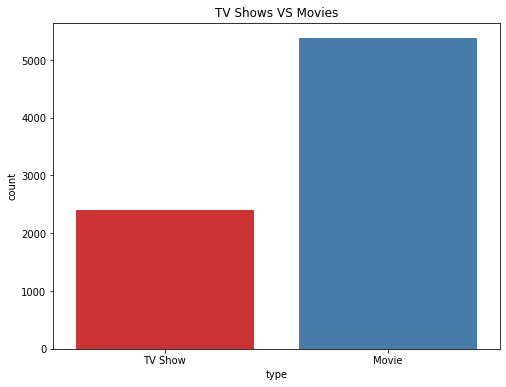

In [7]:
plt.figure(figsize=(8,6))
ax= sns.countplot(x = "type", data = netflix_dataset,palette="Set1")
ax.set_title("TV Shows VS Movies")

This shows that there are more Movies than TV Shows on Netflix

## Netflix Content Updates

## TV Shows analysis

In [8]:
netflix_date= netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x: x.split(',')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x: x.split(' ')[0])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] #::-1 just reverse this nigga

<AxesSubplot:xlabel='year', ylabel='month'>

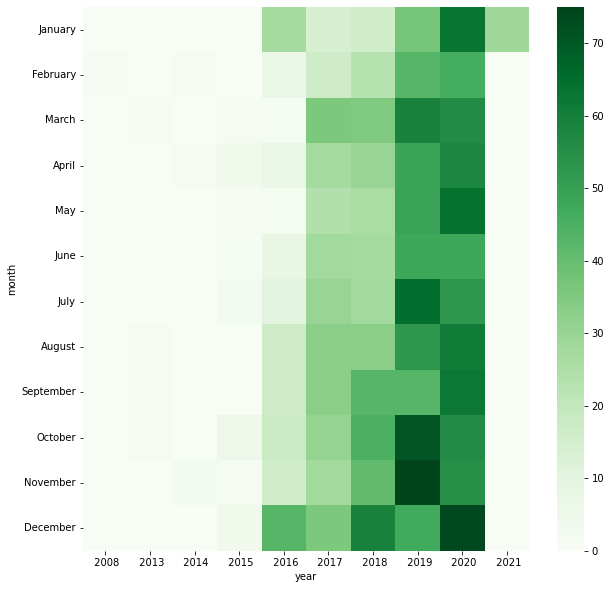

In [9]:
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.subplots(figsize=(10,10))
sns.heatmap(df,cmap='Greens') #heatmap

This heatmap shows frequencies of TV shows added to Netflix throughout the years.

## Movie Ratings Analysis

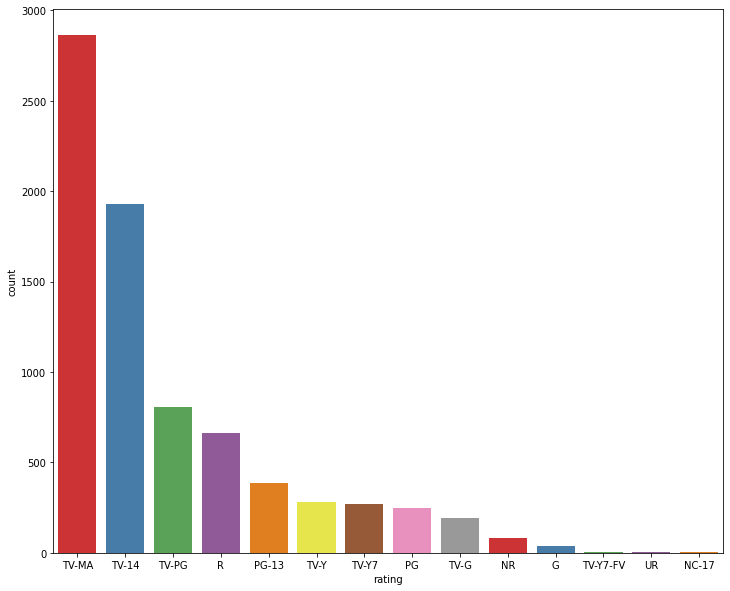

In [10]:
#Movie Rating
plt.figure(figsize=(12,10))
ax = sns.countplot(x="rating", data=netflix_dataset,palette="Set1",order=netflix_dataset['rating'].value_counts().index[0:15]) 

Most number of movies are made with the 'TV-MA' rating. This rating is assiged to a television program that is designed for mature audiences only.

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

In [11]:
#Analysing IMDB ratings to get top rated movies on Netflix
imdb_ratings=pd.read_csv("/kaggle/input/netflix-dataset/IMDb ratings.csv", usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv('/kaggle/input/netflix-dataset/IMDb movies.csv', usecols=['title','year','genre'])

ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)

In [12]:
#joining netflix dataset and imdb dataset
ratings.dropna()
joint_data=ratings.merge(netflix_dataset,left_on='Title',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='Rating', ascending=False)

## Top content creating countries

In [13]:
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count = pd.DataFrame({'Country': country_count.index, 'Shows': country_count.values})
topcountries=country_count[0:11]
topcountries

,Country,Shows
0,United States,799
1,India,702
2,United Kingdom,107
3,Canada,56
4,Philippines,50
5,Spain,40
6,South Korea,36
7,Indonesia,35
8,France,33
9,"United Kingdom, United States",31


## Year wise analysis

In [14]:
Last_fifteen_years = netflix_dataset[netflix_dataset['release_year']>2005 ]
Last_fifteen_years.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


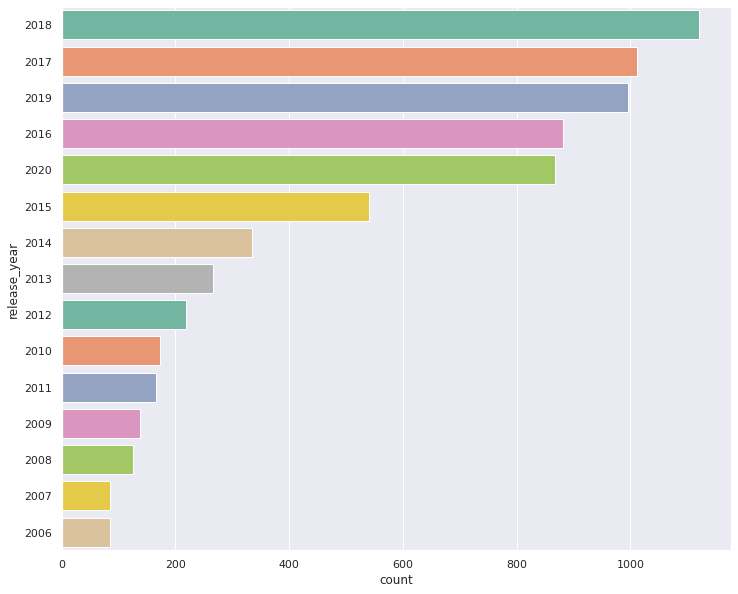

In [15]:
#Year wise analysis in graph
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=Last_fifteen_years, palette="Set2", order=netflix_dataset['release_year'].value_counts().index[0:15])

## Analysis of TV Shows in Netflix

In [16]:
countries={}
netflix_shows['country']=netflix_shows['country'].fillna('Unknown')
cou=list(netflix_shows['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

In [17]:
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

[Text(0, 0, 'UnitedStates'),
 Text(1, 0, 'Canada'),
 Text(2, 0, 'France'),
 Text(3, 0, 'Japan'),
 Text(4, 0, 'UnitedKingdom'),
 Text(5, 0, 'Germany'),
 Text(6, 0, 'Mexico'),
 Text(7, 0, 'Spain'),
 Text(8, 0, 'Australia'),
 Text(9, 0, 'Italy')]

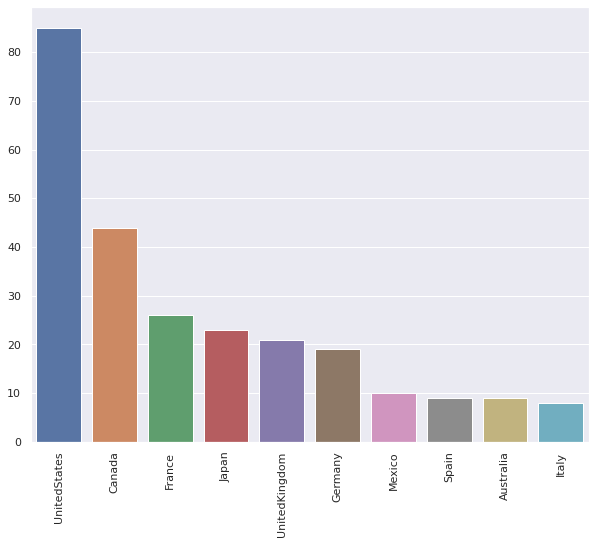

In [18]:
# Top 10 TV shows creating countries.

plt.figure(figsize=(10,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)

## Analysis of duration of movies

In [19]:
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int64

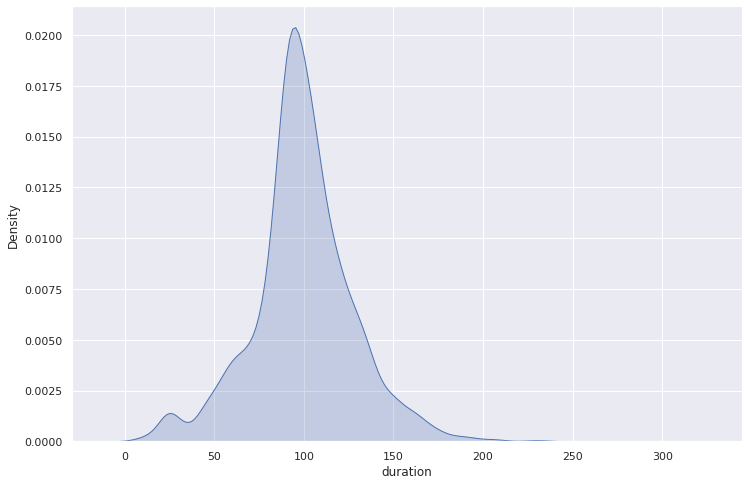

In [20]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
ax=sns.kdeplot(data=netflix_movies['duration'], shade=True)

## Analysis of duration of TV shows

In [21]:
features=['title','duration']
durations= netflix_shows[features]
durations['no_of_seasons']=durations['duration'].str.replace(' Season','')
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

In [22]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

In [23]:
#TV shows with largest number of seasons
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

<AxesSubplot:xlabel='title'>

<Figure size 720x576 with 0 Axes>

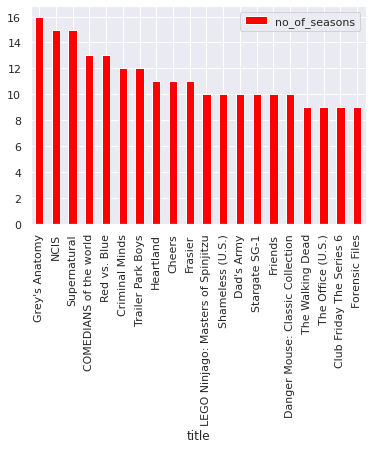

In [24]:
top20=top[0:20]
plt.figure(figsize=(10,8))
top20.plot(kind='bar',x='title',y='no_of_seasons', color='red')

# Content Based Recommendations

We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score.The plot description is given in the description feature of our dataset

In [25]:
#Plot description based Recommender

netflix_dataset['description'].head()

0    In a future where the elite inhabit an island ...
1    After a devastating earthquake hits Mexico Cit...
2    When an army recruit is found dead, his fellow...
3    In a postapocalyptic world, rag-doll robots hi...
4    A brilliant group of students become card-coun...
Name: description, dtype: object

The TF-IDF(Term Frequency-Inverse Document Frequency (TF-IDF) ) score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

Now if you are wondering what is Term Frequency (TF), it is the relative frequency of a word in a document and is given as (term instances/total instances). Inverse Document Frequency (IDF) is the relative count of documents containing the term is given as log(number of documents/documents with term) The overall importance of each word to the documents in which they appear is equal to TF * IDF

This will give us a matrix where each column represents a word in the description vocabulary (all the words that appear in at least one document) and each row represents a movie, as before. This is done to reduce the importance of words that occur frequently in plot descriptions and therefore, their significance in computing the final similarity score.

In [26]:
#Recommedation System(Content Based)

#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a', etc.
tfidf = TfidfVectorizer(stop_words='english')

#Replacing NaN with an empty string
netflix_dataset['description'] = netflix_dataset['description'].fillna('')

#Constructing the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix_dataset['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(7787, 17905)

This means there are 17,905 different words describing the 7787 movies in our dataset.

With this matrix in hand, we can now compute a similarity score. There are several methods for this; such as the euclidean, the Pearson and the cosine similarity scores. There is no right answer to which score is the best. Different scores work well in different scenarios.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:

similarity = cos(x, y) = x . y / ||x|| * ||y||           (Dot product A.B)

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score.

Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster..

In [27]:
#tfidf_matrix.nonzero()
from sklearn.metrics.pairwise import linear_kernel

#compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)

We are going to define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies. Firstly, for this, we need a reverse mapping of movie titles and DataFrame indices. In other words, we need a mechanism to identify the index of a movie in our netflix DataFrame, given its title.

In [28]:
#construct a reverse map if indices and mivie titles
indices = pd.Series(netflix_dataset.index, index = netflix_dataset['title']).drop_duplicates()

## Defining our recommendation system

In [29]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_dataset['title'].iloc[movie_indices]

### Test

In [30]:
get_recommendations('Black Panther')

3204                                      John Henry
7022                                      The Writer
1170                                            Cake
1628                           Daughters of the Dust
7606                           Who Killed Malcolm X?
6792                                The Pyramid Code
2304                                        Fugitiva
7189                              Transformers Prime
4406    Naruto Shippûden the Movie: The Will of Fire
2138                                        Fearless
Name: title, dtype: object

In [31]:
get_recommendations('3 Idiots')

1463                        College Romance
2005                      Engineering Girls
1197                              Candy Jar
4261                              Mr. Young
55      100 Things to do Before High School
4739                                 Pahuna
851                          Best Neighbors
777                              Be with Me
4171                            Moms at War
3790                               Lovesong
Name: title, dtype: object

While our system has done a decent job of finding movies with similar plot descriptions, the quality of recommendations is not that great. "3 idiots" returns movies with similar plots(College Life). But if someone wants the same director or actors, it fails.

Therefore, more metrics should be added to the model to improve performance.

Content based filtering on multiple metrics
Content based filtering on the following factors:
* Title
* Cast
* Director
* Listed in
* Plot

In [32]:
#Filling null values with empty string.
filledna=netflix_dataset.fillna('')

Our next step would be to convert the names and keyword instances into lowercase and strip all the spaces between them. This is done so that our vectorizer doesn't count the Tony of "Tony Stark" and "Tony Anthony" as the same

In [33]:
#Cleaning the data - making all the words lower case
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [34]:
#Identifying features on which the model is to be filtered.
features=['title','director','cast','listed_in','description']
filledna=filledna[features]

In [35]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head()

,title,director,cast,listed_in,description
0,3%,,"joãomiguel,biancacomparato,michelgomes,rodolfo...","internationaltvshows,tvdramas,tvsci-fi&fantasy",inafuturewheretheeliteinhabitanislandparadisef...
1,07:19,jorgemichelgrau,"demiánbichir,héctorbonilla,oscarserrano,azalia...","dramas,internationalmovies","afteradevastatingearthquakehitsmexicocity,trap..."
2,23:59,gilbertchan,"teddchan,stellachung,henleyhii,lawrencekoh,tom...","horrormovies,internationalmovies","whenanarmyrecruitisfounddead,hisfellowsoldiers..."
3,9,shaneacker,"elijahwood,johnc.reilly,jenniferconnelly,chris...","action&adventure,independentmovies,sci-fi&fantasy","inapostapocalypticworld,rag-dollrobotshideinfe..."
4,21,robertluketic,"jimsturgess,kevinspacey,katebosworth,aaronyoo,...",dramas,abrilliantgroupofstudentsbecomecard-countingex...


Here we can see all the words are joined to make a big string.

We are now in a position to create our "soup" or a "bag of words" for all rows, which is a string that contains all the metadata that we want to feed to our vectorizer (namely actors, director and keywords).

In [36]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

filledna['soup'] = filledna.apply(create_soup, axis=1)

The next steps are the same as what we did with our plot description based recommender.

One important difference is that we use the CountVectorizer() instead of TF-IDF. This is because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies. It doesn't make much intuitive sense.

In [37]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])



# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)



# Reset index of our main DataFrame and construct reverse mapping as before
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])


In [38]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_dataset['title'].iloc[movie_indices]

In [39]:
get_recommendations_new('Welcome', cosine_sim2)

6016            Tees Maar Khan
6863             The Shaukeens
1740        Dhoondte Reh Jaoge
3215                     Joker
2862    Humko Deewana Kar Gaye
354                    Aitraaz
6042                 Thank You
3874     Maine Pyaar Kyun Kiya
4846           Phir Hera Pheri
5052                      Race
Name: title, dtype: object

In [40]:
get_recommendations_new('Black Panther', cosine_sim2)

2837                   How It Ends
3006                      Inkheart
5632                   Singularity
1741    Di Renjie zhi Sidatianwang
2586       Halo: The Fall of Reach
4456                          Next
6889          The Space Between Us
391            Alibaba Aur 40 Chor
1849                   Dragonheart
4080              Midnight Special
Name: title, dtype: object

In [41]:
get_recommendations_new('Andhadhun', cosine_sim2)

751        Bareilly Ki Barfi
1104    Brij Mohan Amar Rahe
2571                  Haapus
1261         Chal Dhar Pakad
1032              Bombairiya
4757          Papa the Great
580                 Arisan 2
3052             Irada Pakka
3417               Kita Kita
5695                 Soldier
Name: title, dtype: object